<a href="https://colab.research.google.com/github/ucfilho/Raianars_paper_one_revisited/blob/main/Hybrid/3FRANNK_1DE_Hybrid_Frannk_Schwefel_d10_0_5_0_55_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
############################### Importar códigos
!git clone https://github.com/ucfilho/optim_raianars_Insight/ #clonar do Github
%cd optim_raianars_Insight
import de_soma_Insight
import de_bounds_matriz
import Go2Ann

Cloning into 'optim_raianars_Insight'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 323 (delta 3), reused 0 (delta 0), pack-reused 314
Receiving objects: 100% (323/323), 312.84 KiB | 5.59 MiB/s, done.
Resolving deltas: 100% (184/184), done.
/content/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight/Raianars_paper_One/ANN_read_matrix/optim_raianars_Insight


In [17]:
!git clone https://github.com/ucfilho/Raianars_paper_One #clonar do Github
%cd Raianars_paper_One

Cloning into 'Raianars_paper_One'...
remote: Enumerating objects: 119, done.
remote: Counting objects: 100% (119/119), done.
remote: Compressing objects: 100% (119/119), done.
remote: Total 248 (delta 64), reused 0 (delta 0), pack-reused 129
Receiving objects: 100% (248/248), 654.97 KiB | 3.21 MiB/s, done.
Resolving deltas: 100% (136/136), done.
/content/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight/Raianars_paper_One/ANN_read_matrix/optim_raianars_Insight/Raianars_paper_One


In [18]:
#import Go2Ann
#import de_soma_Insight
#import de_bounds_matriz
#import Function
import Go2MinMax
from AvaliaX import AvaliaX
from GeraIndices import GeraIndices
import numpy as np
import time
import matplotlib.pyplot as plt
from random import randint
from scipy import optimize
import pandas as pd
from sklearn.metrics import confusion_matrix

############################### DADOS DE ENTRADA 

Fc=0.1 # fator de correcao parametros da ANN
its=1 #10 # quantas vezes vai usar o NPAR antes de alterar de novo
ITE=2000 #10 # PONTOS quantas vezes vai alteral NPAR 
NPAR=100

fator = 1.0/3.0;  #3FRANNK/1DE

In [19]:
############################### Importar códigos
!git clone https://github.com/ucfilho/optim_raianars_Insight/ #clonar do Github
%cd optim_raianars_Insight
import de_soma_Insight
import de_bounds_matriz

Cloning into 'optim_raianars_Insight'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 323 (delta 3), reused 0 (delta 0), pack-reused 314
Receiving objects: 100% (323/323), 312.84 KiB | 7.11 MiB/s, done.
Resolving deltas: 100% (184/184), done.
/content/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight/Raianars_paper_One/ANN_read_matrix/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight


In [20]:
!git clone https://github.com/ucfilho/Raianars_paper_One #clonar do Github
%cd Raianars_paper_One

Cloning into 'Raianars_paper_One'...
remote: Enumerating objects: 119, done.
remote: Counting objects: 100% (119/119), done.
remote: Compressing objects: 100% (119/119), done.
remote: Total 248 (delta 64), reused 0 (delta 0), pack-reused 129
Receiving objects: 100% (248/248), 654.97 KiB | 11.91 MiB/s, done.
Resolving deltas: 100% (136/136), done.
/content/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight/Raianars_paper_One/ANN_read_matrix/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight/Raianars_paper_One


In [21]:
RUNS=50
mut=0.75
crossp=0.25
Fi=mut;CRi=crossp;# para impressão

############################### Função
import Function
#'''  
############################### Função
dim=10
#fchoice='Rastrigin' 'Michalewicz' 'Schwefel' 'Schwefel_222' Ackley  Styblinskitank sum_squares_function
fchoice='Schwefel'
Fun=Function.Schwefel
MIN,MAX=Go2MinMax.Intervalo(dim,fchoice)

#''' 
#####################################
PAR=len(MAX) #NUM DE PARAMETROS A SER OTIMIZADOS

bounds=[]
for k in range(len(MAX)):
  bounds.append((MIN[k],MAX[k]))

In [22]:
!git clone https://github.com/ucfilho/ANN_read_matrix #clonar do Github
%cd ANN_read_matrix

Cloning into 'ANN_read_matrix'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (18/18), done.
Unpacking objects: 100% (20/20), done.
remote: Total 20 (delta 5), reused 0 (delta 0), pack-reused 0
/content/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight/Raianars_paper_One/ANN_read_matrix/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight/Raianars_paper_One/ANN_read_matrix


In [23]:
ANN_F=pd.read_csv('ANN_INSIGHT_Valor_F.csv')

In [24]:
ANN_CR=pd.read_csv('ANN_INSIGHT_CR.csv')

In [25]:
syn0_F,syn1_F,X_max_F,X_min_F=Go2Ann.GetMatriz(ANN_F)

In [26]:
syn0_CR,syn1_CR,X_max_CR,X_min_CR=Go2Ann.GetMatriz(ANN_CR)

In [27]:
ANN_CR=pd.read_csv('ANN_INSIGHT_CR.csv')

In [28]:
fields = ['DI RELATIVO','FRAC Its','Fo','CRo']

In [29]:
##################################### 

TOTAL=10*dim*its*ITE
TOTAL=int(TOTAL/2)   # CONFERIR SE ESTE EH O MELHOR LUGAR

dimensions=len(MAX)
start_time = time.time() #INICIALIZA CONTAGEM DO TEMPO


PAR=dim
fobj=Fun

MAX_P=np.zeros(ITE) # ATENCAO para variar F e Cr MAX_P passa a ser 3 vezes maior
MIN_P=np.zeros(ITE) # ATENCAO para variar F e Cr MIN_P passa a ser 3 vezes maior

for i in range(dim):
  MAX_P[i]=MAX[i] 
  MIN_P[i]=MIN[i]

rodadas=1
NPAR1=int(fator*NPAR);print('Npar1=',NPAR1);print('frac=',fator)
NPAR2=NPAR-NPAR1;print('Npar2=',NPAR2);print('Npar=',NPAR)

cols=dim

X1=np.zeros((NPAR1,cols)) # X1 is Frannk population
for i in range(NPAR1):
  for j in range(cols):
    r=np.random.random()
    X1[i,j]=r*(MAX[j]-MIN[j])+MIN[j]
    
X2=np.zeros((NPAR2,cols)) # X2 is population DE (default DE)
for i in range(NPAR2):
  for j in range(cols):
    r=np.random.random()
    X2[i,j]=r*(MAX[j]-MIN[j])+MIN[j]
 ############################################################
  #bounds=[(5*dim, 15*dim)] * PONTOS # ITE
  #bounds=[(3*dim, 12*dim)] * PONTOS # ITE
  #bounds=[(4*dim, 16*dim)] * PONTOS
  
  # nao pode ser assim pq o bounds vale p o DE nao dos parametros
  #p=int(TOTAL/its/ITE) 
  #bounds=[(p, p)] * PONTOS


Npar1= 33
frac= 0.3333333333333333
Npar2= 67
Npar= 100


In [30]:

start_time = time.time()
BEST_AGENTS=[]
MAT_stat=[]
for iii in range(RUNS):
    MAT=[] 
    mut=Fi
    crossp=CRi
    SOMA=0
    pop = np.random.rand(NPAR, dim)
    diff=np.zeros(PAR)
    X1=np.zeros((NPAR1,cols)) # X1 is Frannk population
    for i in range(NPAR1):
      for j in range(cols):
        r=np.random.random()
        X1[i,j]=r*(MAX[j]-MIN[j])+MIN[j]
        
    X2=np.zeros((NPAR2,cols)) # X2 is population DE (default DE)
    for i in range(NPAR2):
      for j in range(cols):
        r=np.random.random()
        X2[i,j]=r*(MAX[j]-MIN[j])+MIN[j]
    
    DIo=1e99
  
    CRo=crossp;Fo=mut;
    Fitness = np.asarray([Fun(ind) for ind in X1])
    XY,BEST_XY,BESTo,FOBESTo=AvaliaX(X1,Fitness)
    nrow,ncol=X1.shape

    QUANT=17;MAT_INDo=np.zeros((1,QUANT)); # quantos indices esta fazendo
    MAT_INDo[0,5]=nrow  # VALOR NP
    MAT_INDo[0,6]=Fo    # VALOR Fo   
    MAT_INDo[0,7]=CRo   # VALOR CRo
  
    MAT_INDo=GeraIndices(X1,BESTo,FOBESTo,DIo,MAT_INDo,SOMA,TOTAL,syn0_F,
                        syn1_F,X_max_F,X_min_F,syn0_CR,syn1_CR,X_max_CR,
                        X_min_CR,Fc,fields,Fun)
  
    DIo=np.copy(MAT_INDo[0,0])
    MAT_INDo[0,15]=Fo    # VALOR Fo   
    MAT_INDo[0,16]=CRo   # VALOR CRo
    #ind_crossp=ITE-1
    

    
    for k in range(ITE):

      X1,BEST2,FOBEST,XY,BEST_XY=de_bounds_matriz.de(bounds, mut, crossp,NPAR1, its,fobj,X1)
      
      
      X2,BEST1,FOBEST,XY,BEST_XY,SOMA= de_soma_Insight.de(MAX,MIN, mut, crossp,NPAR2,its,Fun,X2,SOMA,TOTAL)

      MAT_IND=GeraIndices(X1,BESTo,FOBESTo,DIo,MAT_INDo,SOMA,TOTAL,syn0_F,
                          syn1_F,X_max_F,X_min_F,syn0_CR,syn1_CR,X_max_CR,
                          X_min_CR,Fc,fields,Fun)
    
      BESTo=np.copy(BEST1);FOBESTo=np.copy(FOBEST);
      MAT.append(MAT_IND.ravel())
    
      MAT_INDo[0,6]=MAT_IND[0,15]   # VALOR Fo   
      MAT_INDo[0,7]=MAT_IND[0,16]   # VALOR CRo
      mut=MAT_IND[0,15]
      crossp=MAT_IND[0,16]
      X1[0,:] = BEST2;
      X1[NPAR1-1,:] = BEST1;
      X2[0,:] = BEST1;
      X2[NPAR2-1,:] = BEST2;
    print('k=',iii,'time=',(time.time()-start_time)/60, 'FOBEST=',FOBEST)  
    BEST_AGENTS.append(BEST_XY)
    MAT_stat.append(MAT)
    #print("GlobalParam e Solucao:", BEST,"Funcao=",FOBEST)
    
############################## Cálculo dos Parâmetros de Avaliação   
TIME = (time.time() - start_time)/RUNS
BEST_AGENTS=np.array(BEST_AGENTS)
BEST_AGENTS_ST= BEST_AGENTS[BEST_AGENTS[:,-1].argsort()]
BEST=BEST_AGENTS_ST[0]
WORSE=BEST_AGENTS_ST[-1]
MEAN=np.mean(BEST_AGENTS,axis=0)
MAXFO=BEST_AGENTS[:,-1].max()
MINFO=BEST_AGENTS[:,-1].min()
STD=BEST_AGENTS[:,-1].std()

/content/optim_raianars_Insight/Raianars_paper_One/GeraIndices.py:57: RuntimeWarning: invalid value encountered in double_scalars
  if abs(MAT_IND[0,8]/MAT_IND[0,8])>1:
/content/optim_raianars_Insight/Raianars_paper_One/GeraIndices.py:60: RuntimeWarning: invalid value encountered in double_scalars
  MAT_IND[0,10]=MAT_IND[0,8]/MAT_IND[0,8]
/content/optim_raianars_Insight/Raianars_paper_One/GeraIndices.py:62: RuntimeWarning: invalid value encountered in double_scalars
  if abs(MAT_IND[0,9]/MAT_IND[0,9])>1: # tem que pegar primeira
/content/optim_raianars_Insight/Raianars_paper_One/GeraIndices.py:65: RuntimeWarning: invalid value encountered in double_scalars
  MAT_IND[0,11]=MAT_IND[0,9]/MAT_IND[0,9] # tem que pegar do anterior


k= 0 time= 0.8741244792938232 FOBEST= 0.0
k= 1 time= 1.8129136164983113 FOBEST= 0.0
k= 2 time= 2.7464420557022096 FOBEST= 0.0
k= 3 time= 3.6588513414065043 FOBEST= 9.094947017729282e-13
k= 4 time= 4.566522220770518 FOBEST= 0.0
k= 5 time= 5.425493109226227 FOBEST= 0.0
k= 6 time= 6.2846337040265405 FOBEST= 0.0
k= 7 time= 7.145422657330831 FOBEST= 0.0
k= 8 time= 8.089567720890045 FOBEST= 0.0
k= 9 time= 8.960341199239094 FOBEST= 0.0
k= 10 time= 9.811474104722341 FOBEST= 0.0
k= 11 time= 10.681213895479837 FOBEST= 0.0
k= 12 time= 11.556790181001027 FOBEST= 0.0
k= 13 time= 12.428350679079692 FOBEST= 0.0
k= 14 time= 13.302917257944744 FOBEST= 0.0
k= 15 time= 14.167301650842031 FOBEST= 0.0
k= 16 time= 15.039544943968455 FOBEST= 0.0
k= 17 time= 15.911635533968608 FOBEST= 0.0
k= 18 time= 16.767539552847545 FOBEST= 0.0
k= 19 time= 17.704818971951802 FOBEST= 0.0
k= 20 time= 18.58044887781143 FOBEST= 0.0
k= 21 time= 19.452517851193747 FOBEST= 0.0
k= 22 time= 20.318038856983186 FOBEST= 0.0
k= 23 time

In [31]:
#len(X2[1,:])
print(cols)

10


In [32]:
NOMES=['DIVERSIDADE (DI)',  'DI RELATIVO','FRAC Its',
           'VELOC FOBJ','VELOC X','NP','Fo','CRo','fmin','fmax',
           'AD_fmin','AD_fmax','DELTA FOBJ','DELTA VX','r_fitness',
           'F','CR']
# BEST_INDEX= BEST_AGENTS[BEST_AGENTS[:,-1].argmin()]  
BEST_INDEX = np.argmin(BEST_AGENTS[:,-1])
df=pd.DataFrame(MAT_stat[BEST_INDEX], columns=NOMES)



In [33]:
pd.set_option('display.max_columns', 30)  
print(df)

      DIVERSIDADE (DI)  DI RELATIVO  FRAC Its  VELOC FOBJ  VELOC X    NP  \
0           935.758541     1.007486   0.00067         1.0      2.0  33.0   
1           938.712152     1.010666   0.00134         0.0      0.0  33.0   
2           959.851327     1.033426   0.00201         0.0      0.0  33.0   
3           961.668886     1.035383   0.00268         1.0      2.0  33.0   
4           985.273233     1.060796   0.00335         1.0      2.0  33.0   
...                ...          ...       ...         ...      ...   ...   
1995          0.000000     0.000000   1.00001         0.0      0.0  33.0   
1996          0.000000     0.000000   1.00001         0.0      0.0  33.0   
1997          0.000000     0.000000   1.00001         0.0      0.0  33.0   
1998          0.000000     0.000000   1.00001         0.0      0.0  33.0   
1999          0.000000     0.000000   1.00001         0.0      0.0  33.0   

            Fo       CRo         fmin         fmax  AD_fmin  AD_fmax  \
0     0.750000 

Text(0, 0.5, 'CR')

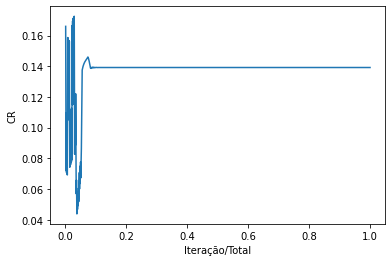

In [34]:
plt.plot(df['FRAC Its'],df['CR'])
plt.xlabel('Iteração/Total')
plt.ylabel('CR')

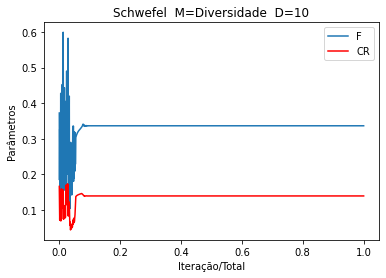

In [35]:

fig, ax = plt.subplots()
ax.plot(df['FRAC Its'],df['F'],label='F')
ax.set_xlabel('Iteração/Total')
ax.set_ylabel('Parâmetros')
ax.plot(df['FRAC Its'],df['CR'],'-r', label='CR')
nome=Fun.__name__+'  M=Diversidade'+ '  D='+str(dim)
ax.set_title(nome)
leg = ax.legend()


Text(0.5, 1.0, 'Schwefel_Diversidade_D=10')

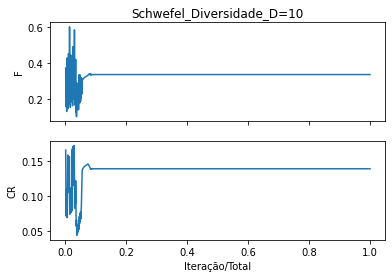

In [36]:
f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(df['FRAC Its'],df['F'])
axarr[0].set_ylabel('F')
axarr[1].plot(df['FRAC Its'],df['CR'])
axarr[1].set_ylabel('CR')
axarr[1].set_xlabel('Iteração/Total')
nome=Fun.__name__+'_Diversidade_'+ 'D='+str(dim)
axarr[0].set_title(nome)


In [37]:
nome='_ANN_Div3x4_Fo-'+str(Fi)+'_CRo-'+str(CRi)+'_D-'+str(dim)+'_Interv-'+str(ITE)
print('H-FRANNK - ','TOTAL=',TOTAL,'Iterações=',ITE*its,'Dim=', PAR,"Min/Max=",MIN[0],"/",MAX[0],'_',Fun.__name__)
print(nome, '\n')
#print('BEST: ',BEST)
#print('MÉDIA: ',MEAN)
print('MÉDIA: ',MEAN[-1])
print('MIN __:',MINFO)
print('MAX__: ',MAXFO)
print('STD __:',STD)
print("Tempo Médio= %.3f segundos ---" % (TIME))
print(RUNS,'Rodadas') 
print()
print('BEST: ',BEST)
# print('melhor=',BEST_AGENTS[BEST_INDEX])

H-FRANNK -  TOTAL= 100000 Iterações= 2000 Dim= 10 Min/Max= -500 / 500 _ Schwefel
_ANN_Div3x4_Fo-0.75_CRo-0.25_D-10_Interv-2000 

MÉDIA:  9.094947017729283e-14
MIN __: 0.0
MAX__:  9.094947017729282e-13
STD __: 2.7284841053187846e-13
Tempo Médio= 52.617 segundos ---
50 Rodadas

BEST:  [420.96874553 420.96874733 420.96874625 420.96874595 420.96874562
 420.968747   420.96874561 420.96874574 420.96874716 420.96874623
   0.        ]
